In [ ]:
# Let's install the relevant packages
!pip install diffusers
!pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.2 MB/s eta 

In [ ]:
# Let's load the libraries
from diffusers import StableDiffusionPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
# Let's import the models
model_id = "stabilityai/stable-diffusion-2"

pipe = StableDiffusionPipeline.from_pretrained(model_id, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda") #we push the model to the GPU

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:270: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
unet/diffusion_pytorch_model.safetensors not found


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/900 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/815 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
prompt = "cat themed"

In [ ]:
def text2image(prompt):
  """Generates an image from a text prompt, handling programming-related
     requests with code blocks, if applicable.

  Args:
    prompt: The text description for the desired image.

  Returns:
    PIL.Image: The generated image.
  """

  image = pipe(prompt, height=768, width=768, guidance_scale = 10).images[0]

  image.save("sd_image.png")

  return image

  0%|          | 0/50 [00:00<?, ?it/s]

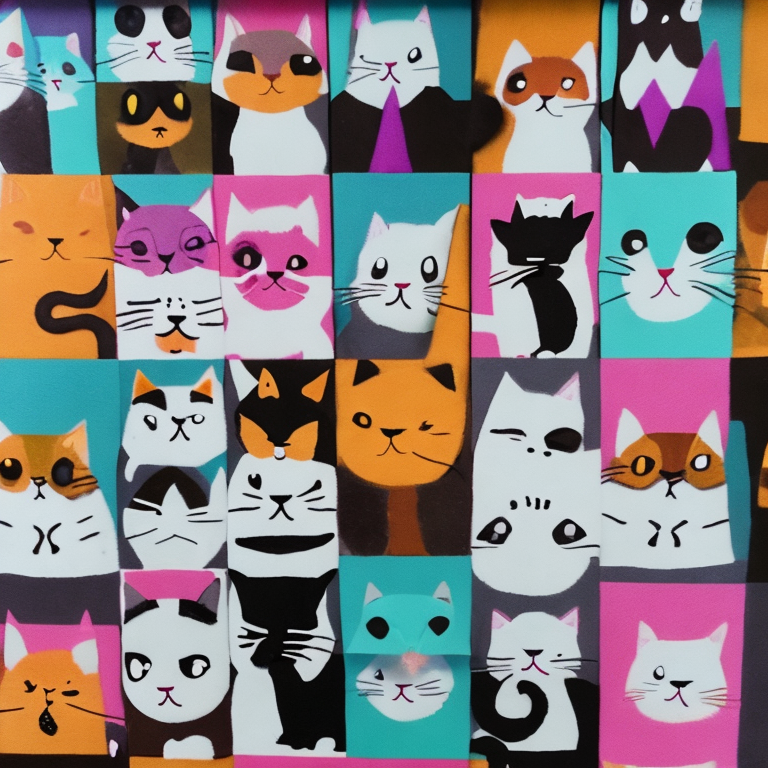

In [ ]:
text2image(prompt)

Section 3: text to image

In [ ]:
import gradio as gr

gr.Interface(text2image, gr.Text(), gr.Image(), title = 'Stable Diffusion 2.0 Colab with Gradio UI').launch(share = True, debug = True)

#add a code when it generates

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://66e2a49125d142ee0f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://b6bf86eb0e4473b6d7.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://d6282f3c5e1cc3b897.gradio.live
Killing tunnel 127.0.0.1:7862 <> https://66e2a49125d142ee0f.gradio.live


AttributeError: module 'gradio' has no attribute 'close'

Section 3: image to text (label output)

In [ ]:
import tensorflow as tf #Imports TensorFlow, a powerful library for numerical computation and machine learning.
import numpy as np
from PIL import Image
import gradio as gr

In [ ]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import gradio as gr

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def predict_image(image):
    raw_image = Image.fromarray(image.astype('uint8'), 'RGB')
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

iface = gr.Interface(fn=predict_image,
                     inputs=gr.Image(),
                     outputs="text",
                     title="BLIP Image Captioning",
                     description="Upload an image to generate a textual description")

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e5852be61584f14742.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Section 4: image to text (recommendtion output)

In [22]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import gradio as gr

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Assuming we only identify a few basic scene types for simplicity, each associated with furniture recommendations
#maybe we can incorporate ChatGPT here to give us feedback, currently we are only using the following...
FURNITURE_RECOMMENDATIONS = {
    'living room': ['Add an area rug', 'Create a gallery wall', 'Add a feature wall', 'Add some plants'],
    'bedroom': ['Incorporate mirrors', 'Add mood lighting', 'Buy new bedding'],
    'dining room': ['Change the light fixture', 'Add accent chair', 'Add wall paneling'],
    'office': ['Add standing desk', 'Add laptop stand', 'Include natural light'],
    'kitchen': ['Install under-cabinet lighting for ambiance', 'Upgrade to stainless steel appliances', 'Opt for sleek and handleless cabinets', 'Incorporate a kitchen island with seating'],
    'bathroom': ['Install a rainfall showerhead', 'Use high-quality, moisture-resistant paint', 'Incorporate storage solutions like shelves or cabinets'],

    # Add as many as needed
}

def predict_furniture(image):
    raw_image = Image.fromarray(image.astype('uint8'), 'RGB')
    inputs = processor(raw_image, return_tensors="pt")

    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)

    # Extract room type from the generated caption
    room_type = None
    for key in FURNITURE_RECOMMENDATIONS.keys():
        if key in caption.lower():
            room_type = key
            break

    if room_type is None:
        room_type = 'unknown: Please contact our customer support'  # If the caption doesn't match any predefined room type

    # Fetch the furniture recommendations based on the determined room type
    recommendations = FURNITURE_RECOMMENDATIONS.get(room_type, [])

    # Format the recommendations as a response
    return 'Recommendations for {}: {}'.format(room_type, ', '.join(recommendations))

iface = gr.Interface(fn=predict_furniture,
                     inputs="image",
                     outputs="text",
                     title="Furniture Recommendation System",
                     description="Upload a room image to get furniture addition recommendations")

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://fe213e84dd3231c273.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
